In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Exploratory data analysis

In [2]:
df = pd.read_csv("heart-disease.csv")          # Read data file
df.head()                                     # Show the first samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


Check the missing values

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check for categorical variables

In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


Explore variables

In [6]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 14 numerical variables

The numerical variables are : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for distribution and outliers

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

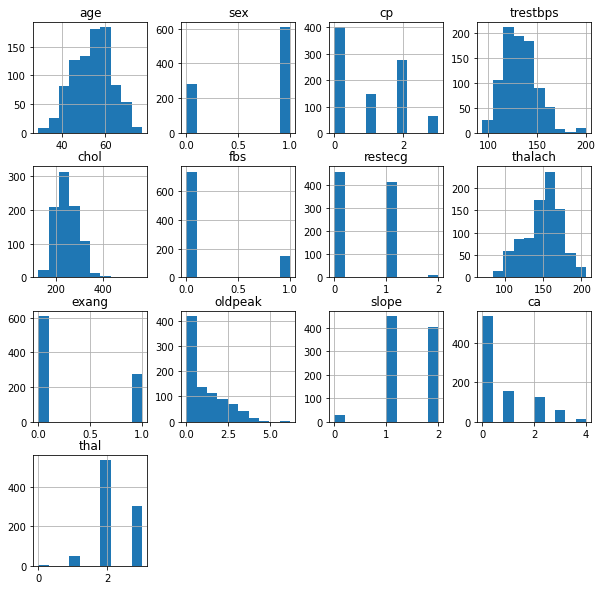

In [9]:
col = df.drop(['target'], axis = 1)
df.hist(column=col.describe().columns, figsize=(10, 10))

Logistics Regression Model

In [10]:
X = df.drop(['target'], axis=1)

y = df['target']

In [11]:
# Split the dataset to training and testing, ratio 70:30.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)         # Train-test split with fixed random state

print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (620, 13)
y_train: (620,)
X_test: (266, 13)
y_test: (266,)


In [12]:
#Scale dataset
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
X_train_scaler = scaler.fit_transform(X_train)       # Fit (compute mean and std), then transform training data using these values.
X_test_scaler = scaler.transform(X_test)         

In [20]:
X_train_scaler

array([[-0.61610104,  0.6926136 ,  0.98965756, ...,  1.05851573,
         1.19020873, -0.50919097],
       [-0.40240445,  0.6926136 , -0.95207563, ..., -0.75441177,
        -0.70191797,  1.25448725],
       [ 0.45238188, -1.44380647,  0.98965756, ...,  1.05851573,
        -0.70191797, -0.50919097],
       ...,
       [ 0.87977505,  0.6926136 ,  0.01879097, ...,  1.05851573,
        -0.70191797, -0.50919097],
       [ 0.98662334, -1.44380647, -0.95207563, ..., -0.75441177,
         1.19020873, -0.50919097],
       [-0.08185958, -1.44380647, -0.95207563, ...,  1.05851573,
        -0.70191797, -0.50919097]])

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0)                      # Initialize Logistic Regression model
logmodel.fit(X_train_scaler, y_train) 

LogisticRegression(random_state=0)

In [17]:
# Calculate prediction labels
predictions = logmodel.predict(X_test_scaler)                # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe 
print(final_prediction)

     target
0         0
1         1
2         0
3         0
4         1
..      ...
261       0
262       0
263       0
264       1
265       0

[266 rows x 1 columns]


Evaluation

In [18]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.9607843137254902
Recall:  0.91875
F1:  0.939297124600639
Confusion matrix: 
 [[100   6]
 [ 13 147]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       106
           1       0.96      0.92      0.94       160

    accuracy                           0.93       266
   macro avg       0.92      0.93      0.93       266
weighted avg       0.93      0.93      0.93       266



In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, final_prediction)))

Model accuracy score: 0.9286


In [23]:
print('Training set score: {:.4f}'.format(logmodel.score(X_train_scaler, y_train)))

print('Test set score: {:.4f}'.format(logmodel.score(X_test_scaler, y_test)))

Training set score: 0.9645
Test set score: 0.9286


The training-set accuracy score is 0.9645 while the test-set accuracy to be 0.9286. These two values are quite comparable. So, there is no question of overfitting.